<a href="https://colab.research.google.com/github/lorenzrossi/AMD-ComicsFaces/blob/main/AMD_Models_2Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from os import listdir
import pandas as pd
# Basic packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

# Image preprocessing
import pathlib
import PIL
import PIL.Image
import cv2

# Neural Networks
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical, load_img, img_to_array
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, callbacks, regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, Activation
from keras.optimizers import Adam, SGD, RMSprop
from keras.losses import binary_crossentropy
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

# Cross Validation
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss

tfk = tf.keras
tf.keras.backend.set_floatx("float64")


from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/MyDrive/ComicsFaces'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = pickle.load(open('/content/drive/MyDrive/ComicsFaces/Pickles/X.pickle','rb'))
y = pickle.load(open('/content/drive/MyDrive/ComicsFaces/Pickles/y.pickle','rb'))

pics_classes = ['comics','faces']

images_to_plot = 8

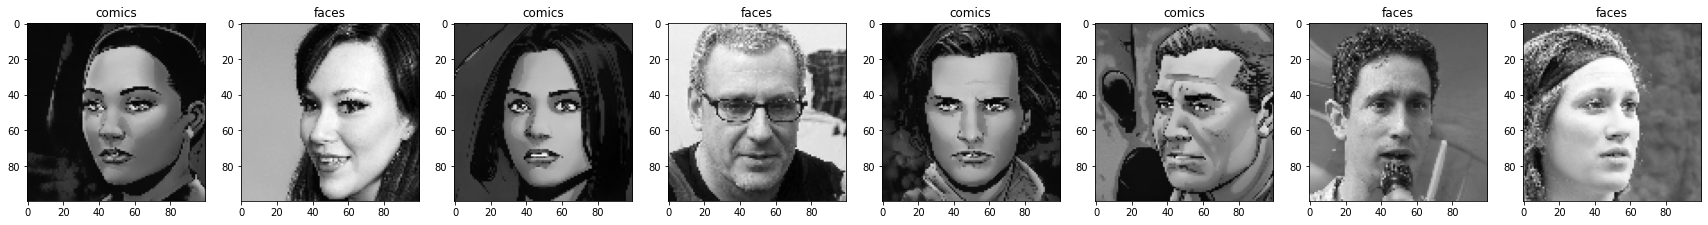

In [ ]:
f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(30, 20)

gray_channel = 0

for i in range(images_to_plot):
  gray_image = X[i][:, :, gray_channel]
  ax[i].imshow(gray_image, cmap = "gray")
  numeric_label = y[i]
  ax[i].set_title(pics_classes[numeric_label])

In [ ]:
number_of_classes = len(pics_classes)

In [ ]:
x_size, img_dim = X.shape[0], X.shape[1]

# rescale in [0,1]
X = tf.cast(X, tf.float32) / 255.0

# one hot encoding
depth = 1
y = tf.reshape(tf.one_hot(y, depth), shape = [x_size, depth])

In [ ]:
# Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
# Hyperparameters
epoch = 20 # n of epochs
batch = 128 # batch size

# Defining the loss
loss = keras.losses.BinaryCrossentropy()

# Defining the optimizer(s)
op_1 = Adam()
op_2 = SGD(learning_rate=0.01, momentum=0.9, decay=0.01/50)
op_3 = RMSprop(learning_rate=1e-3)

In [ ]:
# Defining plots
legend_size = 14

def performance_plot(history):
    plt.figure(figsize=(20,8))

    # Loss plots
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','test'], fontsize = legend_size)

    # Accuracy plots
    plt.subplot(1,2,2)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.ylabel('accuracy', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','val'], fontsize = legend_size)

    plt.show()

# TRAINING MODEL 1

In [ ]:
model1 = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size = (2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(256, use_bias=False, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Dense(128, use_bias=False, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation = 'sigmoid')
        ])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      288       
                                                                 
 batch_normalization_15 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 batch_normalization_16 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                      

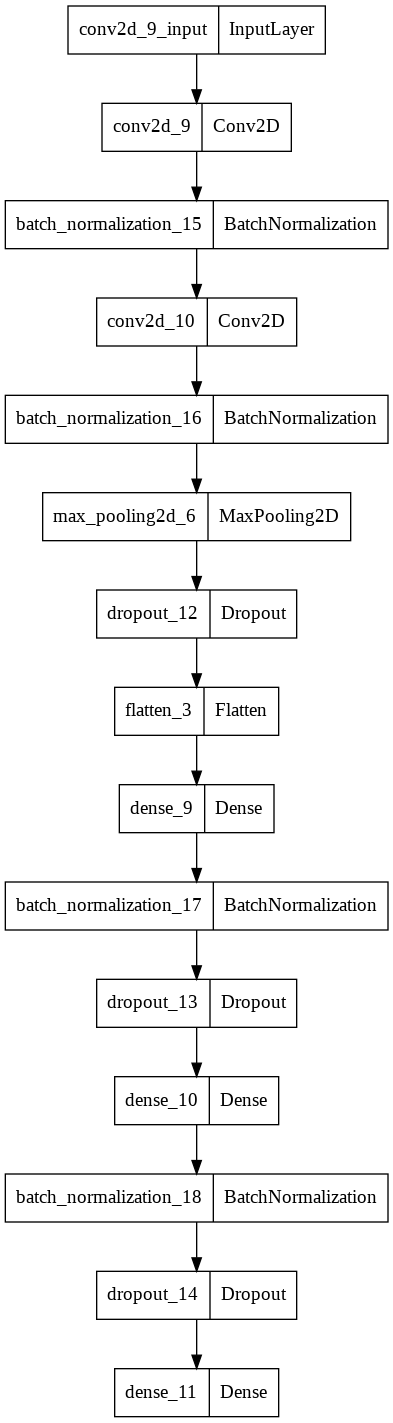

In [ ]:
keras.utils.plot_model(model1, 'model.png')

Epoch 1/20
100/100 [==============================] - 8s 65ms/step - loss: 0.0358 - binary_accuracy: 0.9870 - val_loss: 0.9820 - val_binary_accuracy: 0.5491
Epoch 2/20
100/100 [==============================] - 6s 63ms/step - loss: 0.0031 - binary_accuracy: 0.9995 - val_loss: 4.1958 - val_binary_accuracy: 0.5009
Epoch 3/20
100/100 [==============================] - 6s 63ms/step - loss: 0.0019 - binary_accuracy: 0.9995 - val_loss: 6.0941 - val_binary_accuracy: 0.5012
Epoch 4/20
100/100 [==============================] - 6s 63ms/step - loss: 0.0012 - binary_accuracy: 0.9998 - val_loss: 3.1748 - val_binary_accuracy: 0.5891
Epoch 5/20
100/100 [==============================] - 6s 63ms/step - loss: 0.0011 - binary_accuracy: 0.9995 - val_loss: 0.1088 - val_binary_accuracy: 0.9631
Epoch 6/20
100/100 [==============================] - 6s 63ms/step - loss: 4.9537e-04 - binary_accuracy: 0.9999 - val_loss: 0.3778 - val_binary_accuracy: 0.8625
Epoch 7/20
100/100 [==============================] - 

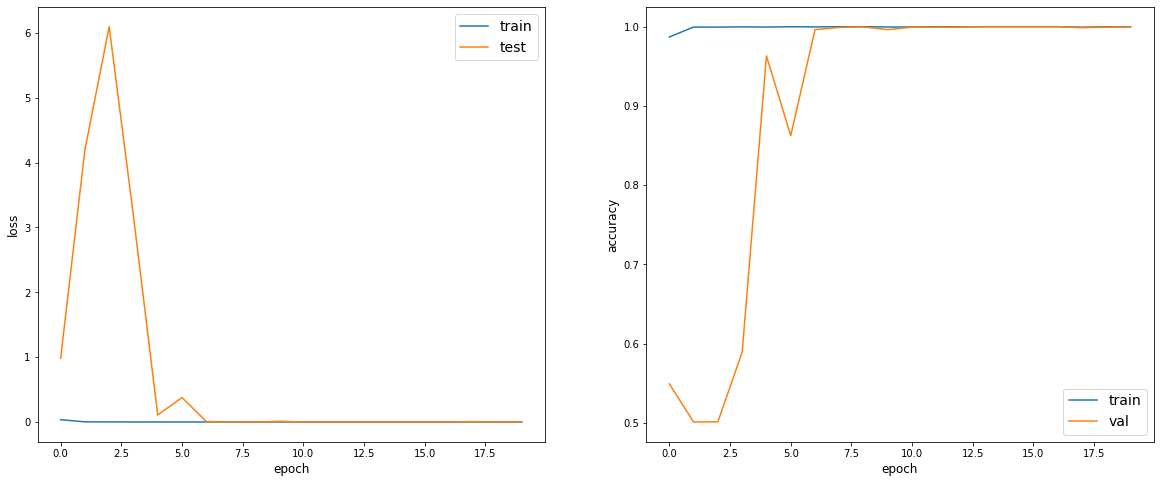

125/125 [==============================] - 1s 7ms/step - loss: 6.6639e-04 - binary_accuracy: 0.9995
test loss, test acc: [0.0006663929109505226, 0.9995]


In [ ]:
# compiling the model
model1.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model1.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_1 = model1.evaluate(X_test, y_test)
print("test loss, test acc:", result_1)

# TRAINING MODEL 2

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 100, 100, 32)      288       
                                                                 
 batch_normalization_19 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 batch_normalization_20 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                      

Epoch 1/20
100/100 [==============================] - 9s 79ms/step - loss: 0.0271 - binary_accuracy: 0.9899 - val_loss: 5.4845 - val_binary_accuracy: 0.5025
Epoch 2/20
100/100 [==============================] - 8s 76ms/step - loss: 0.0038 - binary_accuracy: 0.9986 - val_loss: 16.0960 - val_binary_accuracy: 0.5009
Epoch 3/20
100/100 [==============================] - 8s 76ms/step - loss: 0.0013 - binary_accuracy: 0.9995 - val_loss: 24.2932 - val_binary_accuracy: 0.4900
Epoch 4/20
100/100 [==============================] - 8s 76ms/step - loss: 7.2506e-04 - binary_accuracy: 0.9998 - val_loss: 44.5049 - val_binary_accuracy: 0.5006
Epoch 5/20
100/100 [==============================] - 8s 76ms/step - loss: 0.0013 - binary_accuracy: 0.9997 - val_loss: 12.6341 - val_binary_accuracy: 0.6481
Epoch 6/20
100/100 [==============================] - 8s 77ms/step - loss: 3.5599e-04 - binary_accuracy: 1.0000 - val_loss: 0.9994 - val_binary_accuracy: 0.9019
Epoch 7/20
100/100 [==========================

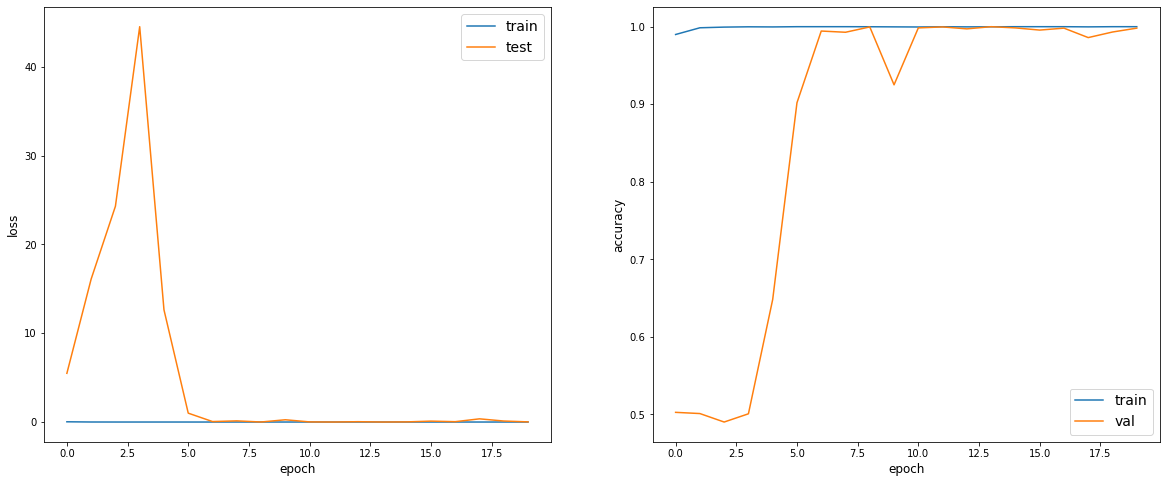

125/125 [==============================] - 1s 8ms/step - loss: 0.0288 - binary_accuracy: 0.9972
test loss, test acc: [0.02877324228866395, 0.99725]


In [ ]:
# compiling the model
model2.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model2.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_2 = model2.evaluate(X_test, y_test)
print("test loss, test acc:", result_2)

# TRAINING MODEL 3

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 100, 100, 32)      288       
                                                                 
 batch_normalization_24 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 batch_normalization_25 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                      

Epoch 1/20
100/100 [==============================] - 10s 87ms/step - loss: 0.0248 - binary_accuracy: 0.9895 - val_loss: 4.3070 - val_binary_accuracy: 0.4991
Epoch 2/20
100/100 [==============================] - 8s 85ms/step - loss: 0.0048 - binary_accuracy: 0.9985 - val_loss: 7.2883 - val_binary_accuracy: 0.4991
Epoch 3/20
100/100 [==============================] - 8s 85ms/step - loss: 0.0019 - binary_accuracy: 0.9995 - val_loss: 6.8648 - val_binary_accuracy: 0.4991
Epoch 4/20
100/100 [==============================] - 8s 85ms/step - loss: 5.6822e-04 - binary_accuracy: 0.9998 - val_loss: 5.3441 - val_binary_accuracy: 0.4984
Epoch 5/20
100/100 [==============================] - 8s 85ms/step - loss: 3.4892e-04 - binary_accuracy: 0.9999 - val_loss: 4.2604 - val_binary_accuracy: 0.4841
Epoch 6/20
100/100 [==============================] - 8s 85ms/step - loss: 7.2381e-04 - binary_accuracy: 0.9998 - val_loss: 1.1178 - val_binary_accuracy: 0.6847
Epoch 7/20
100/100 [=========================

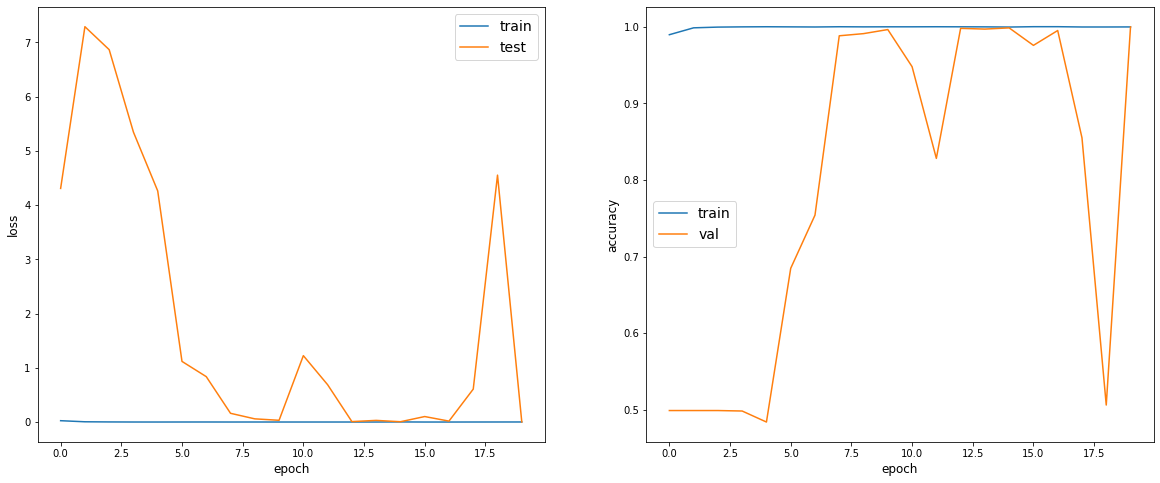

125/125 [==============================] - 1s 8ms/step - loss: 6.7975e-04 - binary_accuracy: 0.9995
test loss, test acc: [0.000679754480559622, 0.9995]


In [ ]:
# compiling the model
model3.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model3.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_3 = model3.evaluate(X_test, y_test)
print("test loss, test acc:", result_3)